# **SUMMARY**

* Bellabeat is a high-tech manufacturer of health-focused products for women.The Bellabeat smart devices provide users with health data related to activity, sleep,stress,menstrual cycle, and minfulness habits.

# 1. **ASK**

* 1.1 Business Task:

 * Analyse Bellabeat products and smart device data to gain insights on how customers use their smart devices.
 * Provide recommendations on how these trends will aid to the company’s marketing strategies.

* 1.2 Key Stakeholders:
 * Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
 * Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
 * Bellabeat marketing analytics team.

# **2. PREPARE**
 - 2.1 Datasets used: FitBit Fitness Tracker Data (A Public Domain, dataset provided by [Mobius]
 - 2.2 This Kaggle data set contains personal fitness tracker from thirty fitbit users between 03.12.2016 - 05.12.2016.
 [](http://www.kaggle.com/datasets/arashnic/fitbit)

- 2.3 load libraries

In [1]:
library(ggpubr)
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)
library(ggplot2)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




- 2.4 Import Datasets

In [2]:
daily_activity <-read_csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heart_rate <-read_csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep <-read_csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

- 2.5 Clean and format datasets

In [3]:
clean_names(daily_activity)
daily_activity <-rename_with(daily_activity, tolower)

clean_names(heart_rate)
heart_rate <-rename_with(heart_rate, tolower)

clean_names(sleep)
sleep <-rename_with(sleep, tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,time,value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95
2022484408,4/12/2016 7:22:10 AM,91
2022484408,4/12/2016 7:22:15 AM,93
2022484408,4/12/2016 7:22:20 AM,94


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


# 3. **PROCESS**

 - 3.1 Preview and Check Datasets

In [4]:
daily_activity <-daily_activity %>%
  distinct() %>%
  drop_na()

heart_rate <-heart_rate%>%
  distinct() %>%
  drop_na()

sleep <-sleep %>%
  distinct() %>%
  drop_na()

In [5]:
n_unique(daily_activity$id)
n_unique(heart_rate$id)
n_unique(sleep$id)

[1] 33

[1] 14

[1] 24

- 3.2 Remove duplicates

In [6]:
sum(duplicated(daily_activity))
sum(duplicated(heart_rate))
sum(duplicated(sleep))

[1] 0

[1] 0

[1] 0

- 3.3 Check datasets

In [7]:
print("check duplicate")
n_distinct(daily_activity)
n_distinct(heart_rate)
n_distinct(sleep)

[1] "check duplicate"


[1] 940

[1] 2483658

[1] 410

In [8]:
print("check null")
sum(is.na(daily_activity))
sum(is.na(heart_rate))
sum(is.na(sleep))

[1] "check null"


[1] 0

[1] 0

[1] 0

- 3.4 Format data columns for merge

In [9]:
daily_activity$date = as.Date(daily_activity$activitydate, format = "%m/%d/%y")
daily_activity$id = as.character(daily_activity$activitydate)

In [10]:
heart_rate %>%
mutate(date = heart_rate$time)

id,time,value,date
<dbl>,<chr>,<dbl>,<chr>
2022484408,4/12/2016 7:21:00 AM,97,4/12/2016 7:21:00 AM
2022484408,4/12/2016 7:21:05 AM,102,4/12/2016 7:21:05 AM
2022484408,4/12/2016 7:21:10 AM,105,4/12/2016 7:21:10 AM
2022484408,4/12/2016 7:21:20 AM,103,4/12/2016 7:21:20 AM
2022484408,4/12/2016 7:21:25 AM,101,4/12/2016 7:21:25 AM
2022484408,4/12/2016 7:22:05 AM,95,4/12/2016 7:22:05 AM
2022484408,4/12/2016 7:22:10 AM,91,4/12/2016 7:22:10 AM
2022484408,4/12/2016 7:22:15 AM,93,4/12/2016 7:22:15 AM
2022484408,4/12/2016 7:22:20 AM,94,4/12/2016 7:22:20 AM


In [11]:
heart_rate$date =as.Date(heart_rate$time,format = "%m/%d/%Y")
heart_rate$id =as.character(heart_rate$id)

In [12]:
head(daily_activity)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
4/12/2016,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-12
4/13/2016,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2020-04-13
4/14/2016,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2020-04-14
4/15/2016,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2020-04-15
4/16/2016,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2020-04-16
4/17/2016,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2020-04-17


In [13]:
sleep$date = as.Date(sleep$sleepday, format = "%m/%d/%Y")
sleep$user_id = as.character(sleep$id)

In [14]:
heart_rate2 <-heart_rate
heart_rate2$user_id = as.character(heart_rate$id)
heart_rate2 <-heart_rate2 %>%
  group_by(user_id,date) %>%
  summarise(avg_heart_rate = mean(value), max_hr = max(value), min_hr = min(value))

`summarise()` has grouped output by 'user_id'. You can override using the
`.groups` argument.


# **4. ANALYSIS AND SHARE**

- 4.1 Visualize Data

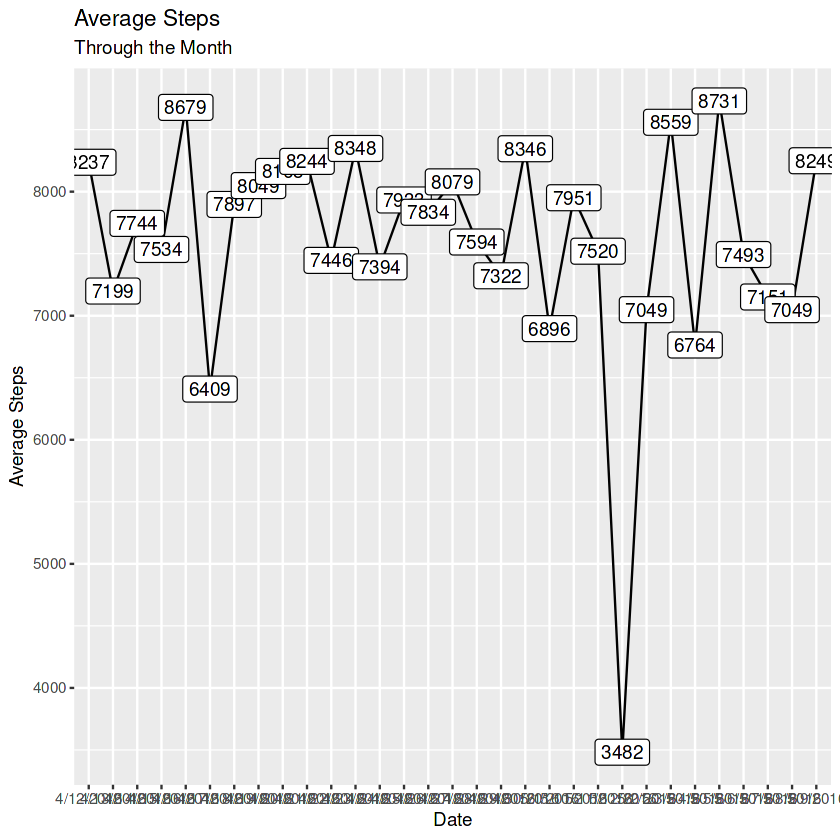

In [15]:
#Visual the average steps through the month
daily_activity %>% 
  select(activitydate, totalsteps) %>% 
  group_by(activitydate) %>% 
  summarize(AverageSteps=round(mean(totalsteps))) %>% 
  ggplot(mapping=aes(x=activitydate,y=AverageSteps))+
  geom_line(group=1)+
  geom_label(aes(label=AverageSteps))+
  labs(title="Average Steps", subtitle="Through the Month", x="Date", y="Average Steps")

daily_activity %>% 
  select(Id, activitydate, totalsteps) %>% 
  filter(totalsteps == "3482")

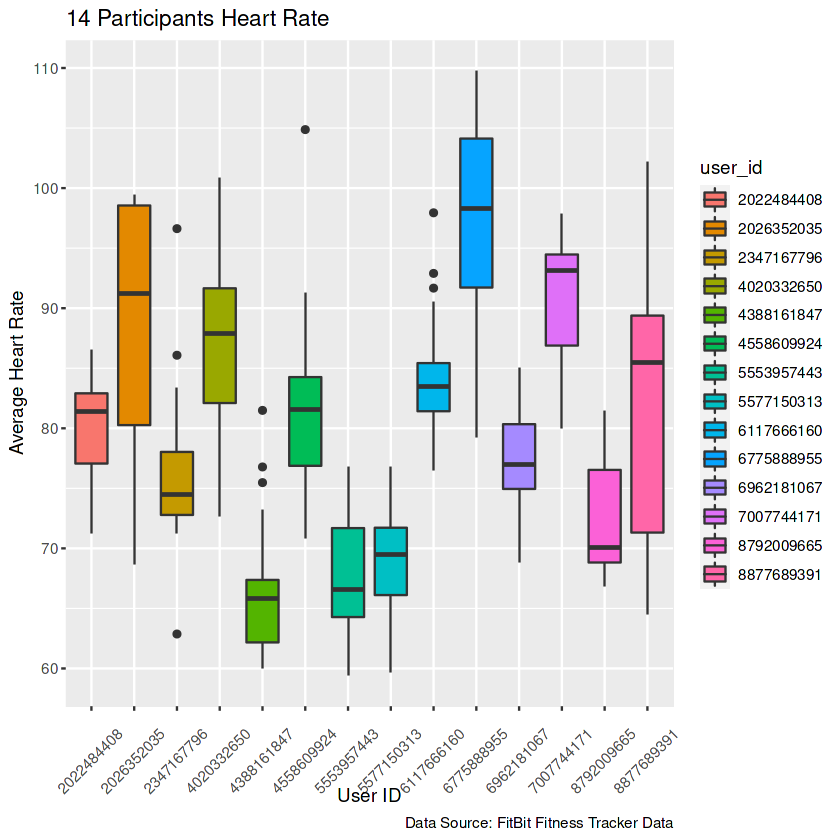

In [16]:
ggplot(data = heart_rate2) +
  geom_boxplot(mapping = aes(x=user_id, y= avg_heart_rate,ymax =max_hr, ymin=min_hr, fill = user_id)) +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.3, hjust = 0.5))+
  labs(title = "14 Participants Heart Rate",    x = "User ID",    y = "Average Heart Rate",
       caption = 'Data Source: FitBit Fitness Tracker Data')

In [17]:
heart_rate3 <-heart_rate %>%
  group_by(id) %>%
  summarise(mean_hr = mean(value), max_hr = max(value), min_hr = min(value))
heart_rate3$user_id = as.character(heart_rate3$id)

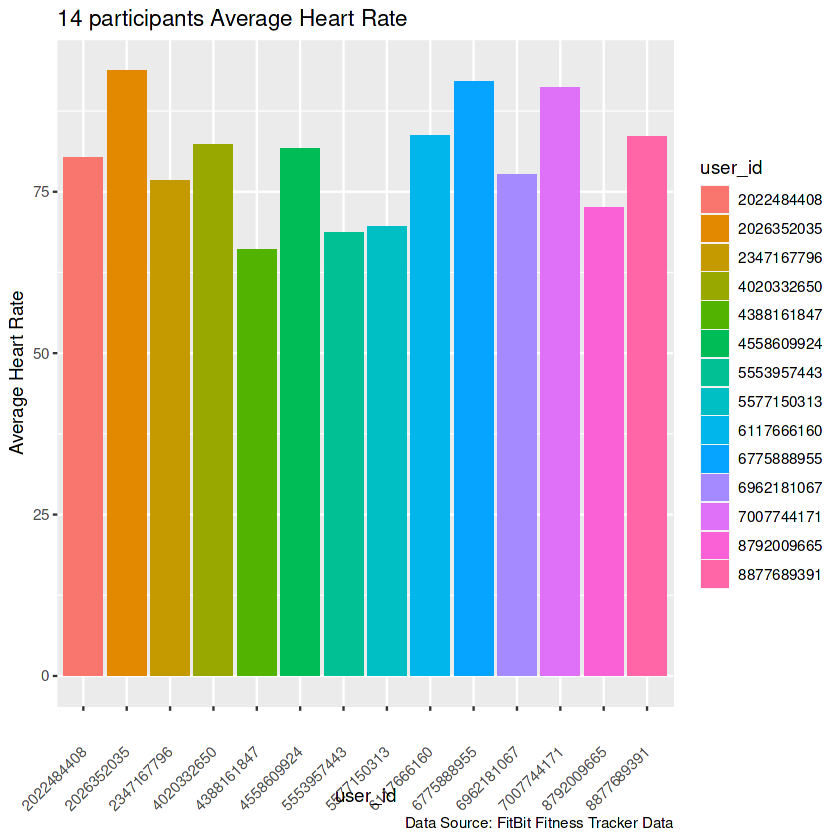

In [18]:
ggplot(data = heart_rate3)+
  geom_col(mapping = aes(x=user_id, y=mean_hr, fill = user_id))+
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))+
  labs(title = "14 participants Average Heart Rate",  y = "Average Heart Rate",
       caption = 'Data Source: FitBit Fitness Tracker Data')

4.1.2 Merge Heart_Rate and Sleep data frames for analysis.

In [19]:
hr_sleep <-merge(heart_rate2, sleep, by=c("user_id","date"))%>%
  drop_na()
n_unique(hr_sleep)
sum(duplicated(hr_sleep))

[1] 570

[1] 0

correlation
<dbl>
0.992001


Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



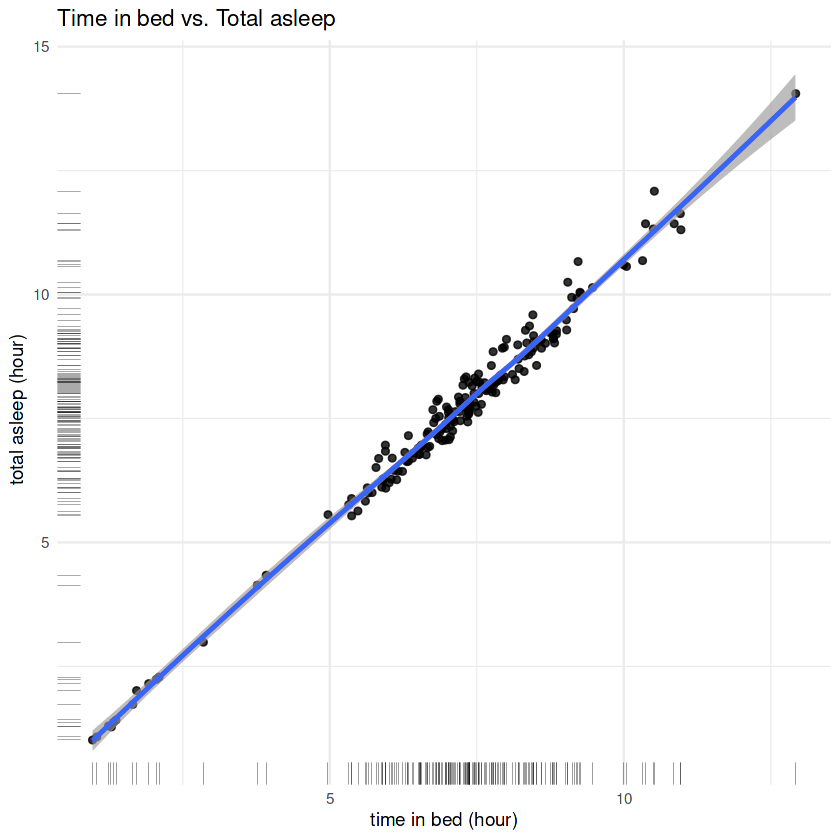

In [20]:
summarize(hr_sleep,correlation=cor(totaltimeinbed, totalminutesasleep))

ggplot(data = hr_sleep,aes(x =totalminutesasleep/60, y=totaltimeinbed/60)) +
    geom_jitter(alpha = .8)+
    geom_rug(position="jitter", size=.08)+
    geom_smooth(color = "red")+
    geom_smooth(linewidth = .6)+
    labs(title = "Time in bed vs. Total asleep", x= "time in bed (hour)", y= " total asleep (hour)")+
    theme_minimal()

- This visualization shows a correlation between the time in bed and sleep hours. It indicates that the time in bed and the sleep time is between 5 to 10 hours simulataneously. 

In [21]:
steps_sleep <-merge(daily_activity,sleep, by =c("id","date")) %>%
  group_by(id) %>%
  select(id,activitydate,totalsteps,totalminutesasleep,calories)%>%
  drop_na()
steps_sleep$id = as.character(steps_sleep$id)
steps_sleep$date = as.Date(steps_sleep$activitydate)

correlation
<dbl>
-0.2682404


Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



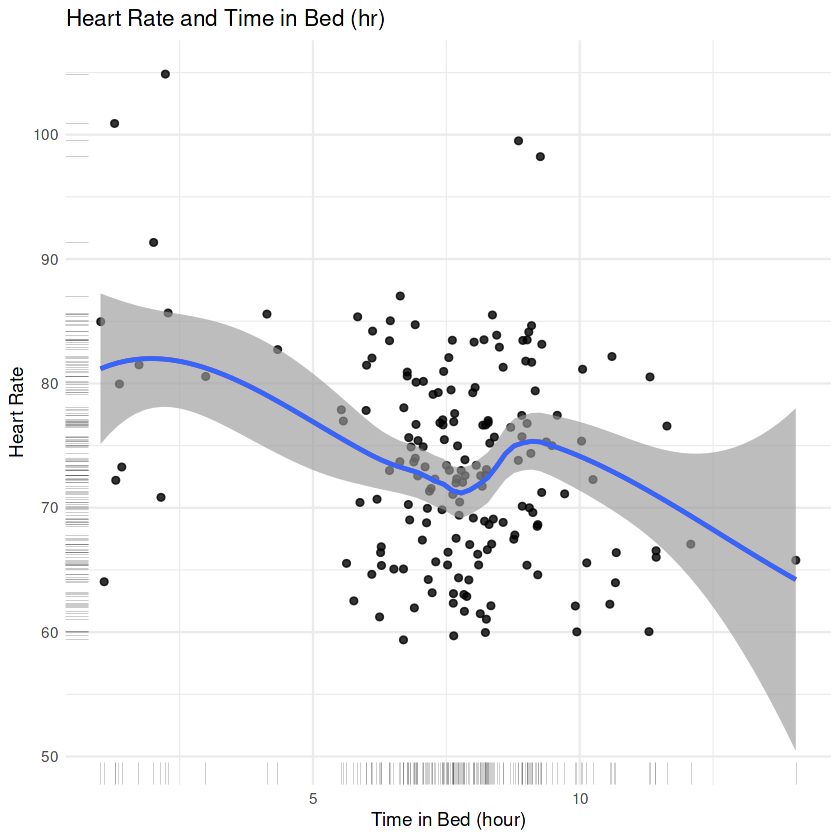

In [22]:
summarize(hr_sleep,correlation=cor(totaltimeinbed, avg_heart_rate))

ggplot(data = hr_sleep,aes(x =totaltimeinbed/60, y= avg_heart_rate))+
  geom_jitter(alpha = .8)+
  geom_rug(position="jitter", size=.04)+
  geom_smooth(color = "red")+
  geom_smooth(linewidth = .6)+
  labs(title = "Heart Rate and Time in Bed (hr)", x= "Time in Bed (hour)", y="Heart Rate")+
  theme_minimal()

The heart rate vs Time in Bed (hr) visualization indicates that the average users Heart Rate is between 59.8 to 87 BPM in 5 to 10.8 hours in bed. The less time they spend in bed the higher their heart rate.

correlation
<dbl>
-0.2523448


Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



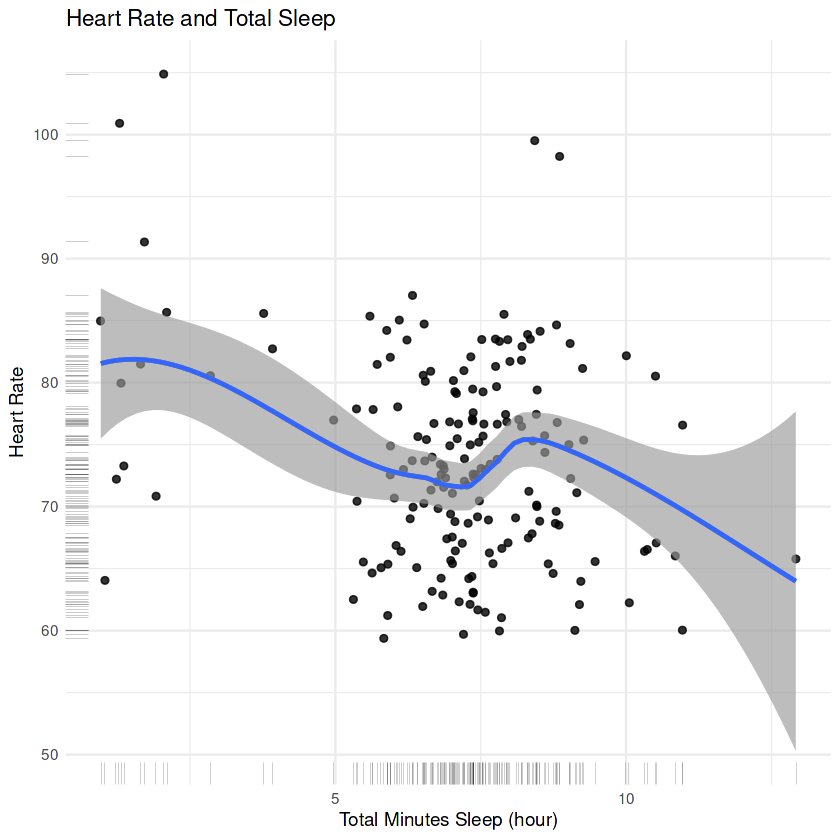

In [23]:
summarize(hr_sleep,correlation=cor(totalminutesasleep, avg_heart_rate))

ggplot(data = hr_sleep,aes(x =totalminutesasleep/60, y= avg_heart_rate))+
  geom_jitter(alpha = .8)+
  geom_rug(position="jitter", size=.04)+
  geom_smooth(color = "gold4")+
  geom_smooth(linewidth = .6)+
  labs(title = "Heart Rate and Total Sleep", x= "Total Minutes Sleep (hour)", y="Heart Rate")+
  theme_minimal()

This chart shows a weak negative correlation between the Heart Rate and Total Minutes Sleep(hr). It shows that the users with a high Heart rate, sleeps lesser than those with moderate/average Heart Rate.

# **5. SHARE/ACT**

- Limitations
 * The data used for this analysis is about 6 years old. Bellabeat needs to carry out a new sets of survey, for data accurancy. 
 * The effect of COVID-19 has impacted alot on human, hence causing a lot of changes in health and well-being living. The lifestyles of users may not align further with the Bella beats smart activities as users expect to see more improvement.

*  Recommendation 
 * More reliable, current and comprehensive data are required for analysis.
 * The analysis shows that users who spends less time in bed tends to have high heart rate.Bellabeat should encourage users to spend more time in bed at night,resulting to more sleep time. By asking users to set sleep goals and recommending daily to users, health benefits of having adequate sleep. As more sleep time results to moderate heart rate. 
 * I couldn't determine the usage trend based on gender and age, hence this analysis could not foretell the age bracket/gender that spends less/more time in bed. I recommend that Bellabeat should include demographic information in their users record.
 * And speaking of users record, the best way Bellabeat can play it smart is by automatically collecting and keeping their users data, from their smarts devices into their database. This will serve as means of primary data collection and would save the day. 